# Petrol Price Forecasting

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("train_data.csv")
df1.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [3]:
df1.tail()

,Date,Petrol (USD)
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61
812,12/31/2018,120.18


### Data Analysis

In [4]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          813 non-null    datetime64[ns]
 1   Petrol (USD)  811 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.8 KB


In [6]:
df1.describe()

,Date,Petrol (USD)
count,813,811.000000
mean,2011-03-21 00:12:23.911439104,110.330481
min,2003-06-09 00:00:00,74.210000
25%,2007-04-30 00:00:00,94.525000
50%,2011-03-21 00:00:00,112.420000
75%,2015-02-09 00:00:00,128.560000
max,2018-12-31 00:00:00,189.510000
std,NaN,19.241182


In [7]:
df1.isnull().sum()

Date            0
Petrol (USD)    2
dtype: int64

In [8]:
df2 = df1.dropna()

In [9]:
df2.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df2.head()

,Date,Petrol
0,2003-06-09,74.59
1,2003-06-16,74.47
2,2003-06-23,74.42
3,2003-06-30,74.35
4,2003-07-07,74.28


In [10]:
df2.set_index('Date', inplace=True)

# Resample the data to monthly frequency and calculate the mean petrol price
monthly_avg = df2['Petrol'].resample('M').mean()
print(monthly_avg.head())

Date
2003-06-30    74.4575
2003-07-31    74.6650
2003-08-31    75.6050
2003-09-30    76.1580
2003-10-31    76.0950
Freq: M, Name: Petrol, dtype: float64


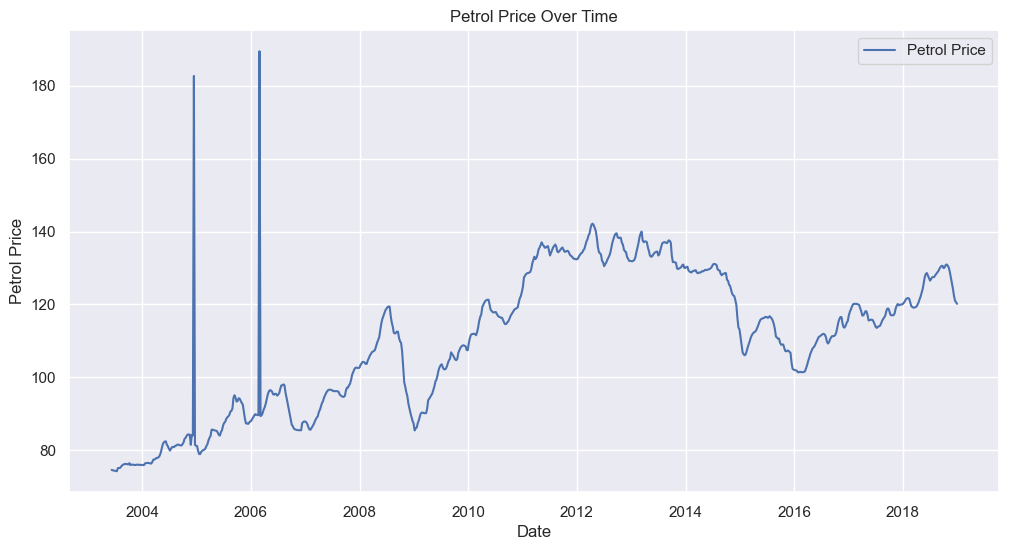

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Petrol'], label='Petrol Price')
plt.title('Petrol Price Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.legend()
plt.show()

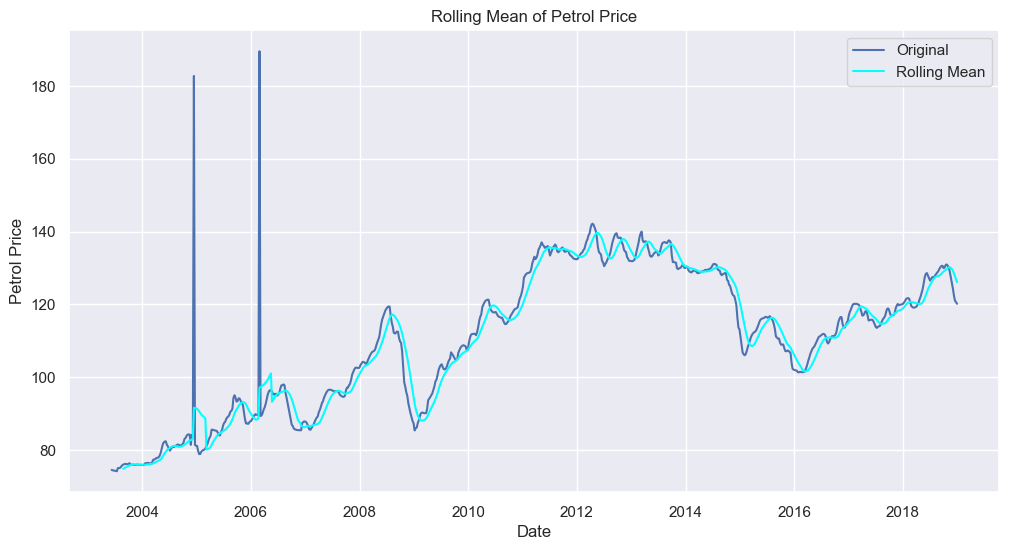

In [12]:
# Rolling mean
rolling_mean = df2['Petrol'].rolling(window=12).mean()

plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Petrol'], label='Original')
plt.plot(df2.index, rolling_mean, color='aqua', label='Rolling Mean')
plt.title('Rolling Mean of Petrol Price')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.legend()
plt.show()

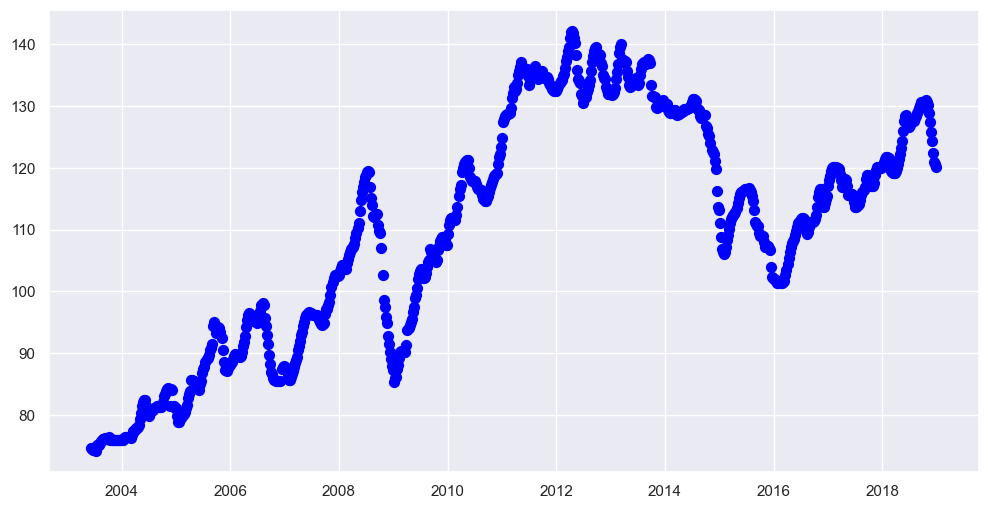

In [13]:
df3=df2[df2.Petrol<160]
plt.figure(figsize=(12, 6))
plt.scatter(df3.index, df3.Petrol,color='blue',label='Prices', s=50)

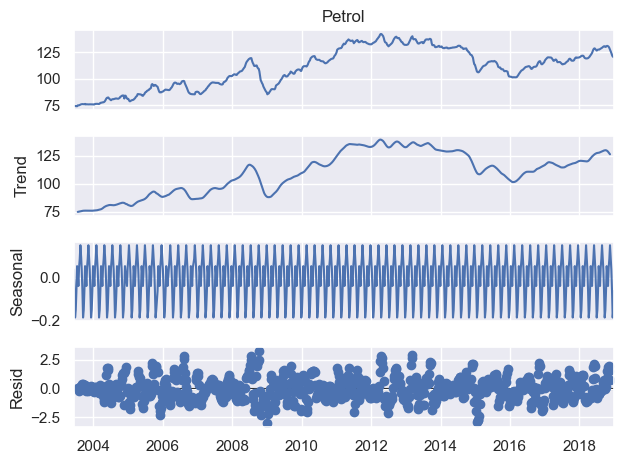

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df3['Petrol'], model='additive', period=12)
result.plot()
plt.show()

<b> Our data is showing seasonality and a varied increasing trend. </b>

In [15]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df3['Petrol'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.9815214804444208
p-value: 0.29473359284329115


<b> Since p-value is > 0.05, our data is non-stationary. </b>

In [16]:
df3.set_index(df3.index, inplace=True)

In [17]:
df3.head()

,Petrol
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28


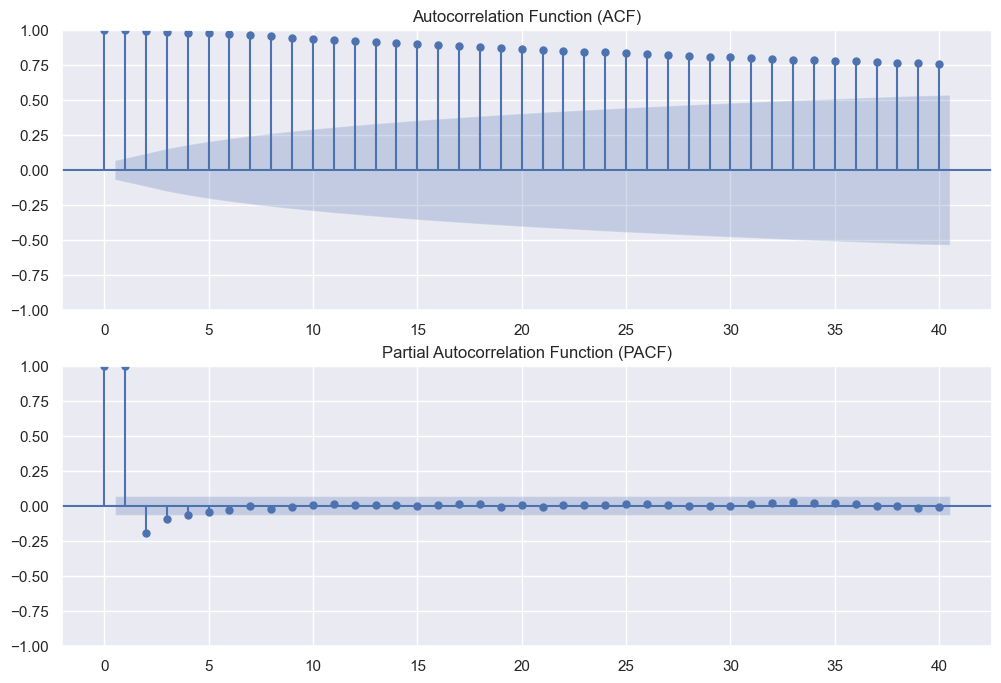

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, figsize=(12, 8))

plot_acf(df3['Petrol'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df3['Petrol'], lags=40, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

### Feature Engineering

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1,1))

In [20]:
df3

array([[0.00559152],
       [0.00382578],
       [0.00309005],
       [0.00206004],
       [0.00103002],
       [0.        ],
       [0.0126545 ],
       [0.01309594],
       [0.01339023],
       [0.01809888],
       [0.02354326],
       [0.02707475],
       [0.02825191],
       [0.02972337],
       [0.02928193],
       [0.0285462 ],
       [0.02751619],
       [0.03266627],
       [0.02486757],
       [0.02707475],
       [0.02633902],
       [0.02633902],
       [0.02545615],
       [0.02530901],
       [0.02663331],
       [0.02633902],
       [0.02589759],
       [0.02575044],
       [0.02516186],
       [0.02545615],
       [0.02457328],
       [0.02486757],
       [0.03163626],
       [0.03281342],
       [0.033402  ],
       [0.03369629],
       [0.03281342],
       [0.03193055],
       [0.03104768],
       [0.03708064],
       [0.04679223],
       [0.04752796],
       [0.04973514],
       [0.05370806],
       [0.05400235],
       [0.05635668],
       [0.06165391],
       [0.074

In [21]:
## Train Test Split
training_size=int(len(df3)*0.65)
test_size=len(df3)-training_size
train_data,test_data=df3[0:training_size,:],df3[training_size:len(df3),:1]

In [22]:
train_data.shape

(525, 1)

In [23]:
test_data.shape

(284, 1)

### Data Preprocessing

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
X_train

array([[0.00559152, 0.00382578, 0.00309005, ..., 0.16627428, 0.16524426,
        0.1640671 ],
       [0.00382578, 0.00309005, 0.00206004, ..., 0.16524426, 0.1640671 ,
        0.16274279],
       [0.00309005, 0.00206004, 0.00103002, ..., 0.1640671 , 0.16274279,
        0.15538552],
       ...,
       [0.91024132, 0.91597999, 0.90847557, ..., 0.88419659, 0.88655091,
        0.88743378],
       [0.91597999, 0.90847557, 0.88802237, ..., 0.88655091, 0.88743378,
        0.87154208],
       [0.90847557, 0.88802237, 0.88449088, ..., 0.88743378, 0.87154208,
        0.87639788]])

In [27]:
y_train

array([0.16274279, 0.15538552, 0.14670394, 0.14420247, 0.15862272,
       0.16642142, 0.18422602, 0.19540906, 0.19894055, 0.21100647,
       0.21762802, 0.22130665, 0.22748676, 0.2405827 , 0.24367275,
       0.2532372 , 0.29664509, 0.30694526, 0.29723367, 0.28134197,
       0.28399058, 0.29487934, 0.29326074, 0.283402  , 0.26868746,
       0.24014126, 0.21188935, 0.19334903, 0.19334903, 0.19114185,
       0.19643908, 0.20114773, 0.20335491, 0.21115362, 0.21777516,
       0.22572101, 0.23057681, 0.22836963, 0.22719247, 0.22645674,
       0.2230724 , 0.22572101, 0.23513832, 0.24941142, 0.25853443,
       0.27310182, 0.29458505, 0.31106533, 0.32254267, 0.32739847,
       0.32636845, 0.32210124, 0.31121248, 0.30944673, 0.31312537,
       0.31238964, 0.30547381, 0.30988817, 0.31606828, 0.33357858,
       0.34682166, 0.34755739, 0.35079459, 0.34741024, 0.316804  ,
       0.29708652, 0.27472042, 0.25412007, 0.22910536, 0.20585639,
       0.18746321, 0.18231313, 0.17216009, 0.16965862, 0.16759

In [28]:
X_train.shape

(424, 100)

In [29]:
y_train.shape

(424,)

# LSTM 

In [30]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [32]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

7/7 [==============================] - 13s 505ms/step - loss: 0.2346 - val_loss: 0.0047
Epoch 2/100
7/7 [==============================] - 1s 168ms/step - loss: 0.0319 - val_loss: 0.0077
Epoch 3/100
7/7 [==============================] - 1s 166ms/step - loss: 0.0241 - val_loss: 0.0084
Epoch 4/100
7/7 [==============================] - 1s 171ms/step - loss: 0.0122 - val_loss: 0.0128
Epoch 5/100
7/7 [==============================] - 1s 168ms/step - loss: 0.0113 - val_loss: 0.0045
Epoch 6/100
7/7 [==============================] - 1s 165ms/step - loss: 0.0089 - val_loss: 0.0037
Epoch 7/100
7/7 [==============================] - 1s 165ms/step - loss: 0.0072 - val_loss: 0.0034
Epoch 8/100
7/7 [==============================] - 1s 167ms/step - loss: 0.0064 - val_loss: 0.0031
Epoch 9/100
7/7 [==============================] - 1s 167ms/step - loss: 0.0059 - val_loss: 0.0033
Epoch 10/100
7/7 [==============================] - 1s 167ms/step - loss: 0.0059 - val_loss: 0.0030
Epoch 1

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 46ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

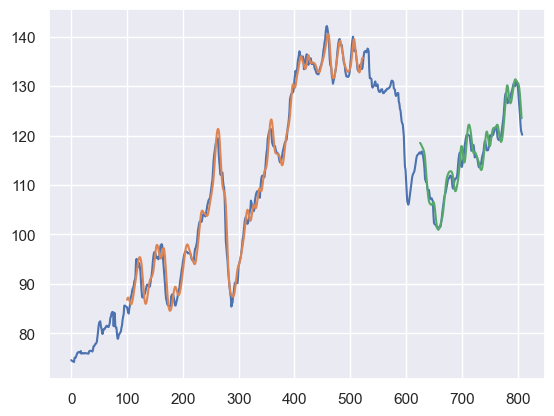

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df3)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
df_test=pd.read_csv("test_data.csv")
df_test.head()

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


## **Using ARIMA**

In [40]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error
from math import sqrt

In [41]:
df = pd.read_csv("train_data.csv")
df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [42]:
df.rename(columns={"Petrol (USD)": "Petrol"}, inplace = True)
df.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [43]:
df2 = df.dropna()
df3=df2[df2.Petrol<160]
df3.head()

,Date,Petrol
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [44]:
df4=df3.reset_index()['Petrol']
df4.head()

0    74.59
1    74.47
2    74.42
3    74.35
4    74.28
Name: Petrol, dtype: float64

In [45]:
# Using auto_arima to find the best ARIMA model
model = auto_arima(df3['Petrol'], seasonal=True, m=12, trace=True, 
                   error_action='ignore', suppress_warnings=True, stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1555.721, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1984.732, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1551.382, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1669.288, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1986.509, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1549.388, Time=0.10 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1551.382, Time=0.32 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1553.246, Time=0.80 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1551.324, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1551.308, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1667.530, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1551.058, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=1548.160, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=1550.148, Time=0.15 sec
 ARIMA(1,1,0)(0,0,1

In [46]:
model = ARIMA(df4.values, order=(1,1,0))
model_fit1 = model.fit()
output= model_fit1.forecast(steps=30)
output

array([119.90144169, 119.72098882, 119.60408964, 119.52836118,
       119.47930353, 119.44752349, 119.42693606, 119.41359931,
       119.40495964, 119.39936277, 119.39573706, 119.39338829,
       119.39186673, 119.39088105, 119.39024252, 119.38982887,
       119.38956091, 119.38938732, 119.38927486, 119.38920201,
       119.38915482, 119.38912425, 119.38910445, 119.38909162,
       119.3890833 , 119.38907792, 119.38907443, 119.38907217,
       119.38907071, 119.38906976])

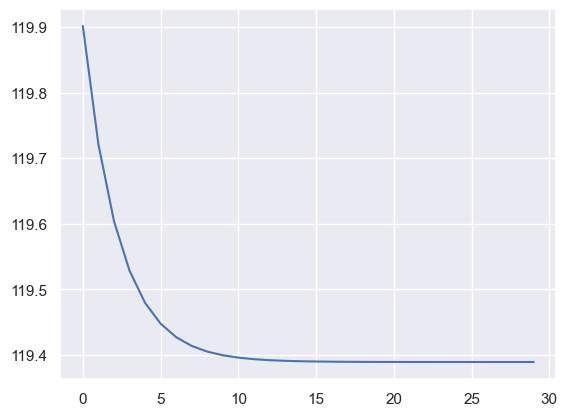

In [47]:
plt.plot(output)